In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.ticker import NullFormatter
plt.rcParams['font.size'] = 15

# manifold.TSNE
from sklearn import manifold  #, datasets
from time import time

## Data and labels 
In this example we know the labels, hence we can test the performances of t-SNE and DBSCAN

In [2]:
fname,fnamey="x_3d.dat","y_3d.dat"
data=np.loadtxt("DATA/"+fname, delimiter='\t')
y=np.loadtxt("DATA/"+fnamey,dtype=int)
N=len(data)
D=len(data[0])
print("N =", N, "\tD =", D)
x=data

N = 600 	D = 3


## Find the typical minimum distance between points
This yields a typical scale, to be used as a reference for "eps"

In [3]:
def dist(x, i, j):
    return np.linalg.norm(x[i] - x[j])

print(dist(x, 13, 1))
mdist = np.zeros(N)
for i in range(N):
    dm = 1e100
    for j in range(N):
        if i != j:
            dij = dist(x, i, j);
            if dij < dm:
                dm = dij
    mdist[i] = dm
mean_min_dist = mdist.mean()
print("Mean minimum distance between points:", mean_min_dist)

569.5269005085432
Mean minimum distance between points: 23.321029500210262


## t-SNE visualization, for true labels

/Users/lorenzobarbiero/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/lorenzobarbiero/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/lorenzobarbiero/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/lorenzobarbiero/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/lorenzobarbiero/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.

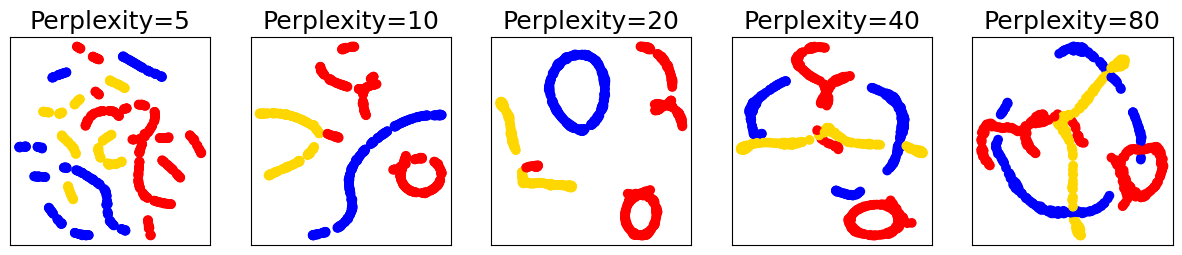

In [4]:
np.random.seed(0)
n_samples = N
n_components = 2 
perplexities = [5, 10, 20, 40, 80]
Np = len(perplexities)
mycmap = ListedColormap(["blue","red","gold" ])

(fig, subplots) = plt.subplots(1,Np , figsize=(3*Np, 2.7))

X_all = []
for i, perplexity in enumerate(perplexities):
    ax = subplots[i]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(data)
    t1 = time()
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=y,cmap=mycmap)
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    X_all.append(Y)
    
plt.show()

Now we fix the perplexity to 20 (best value, somewhat), and vary the `random_state` parameter.

/Users/lorenzobarbiero/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/lorenzobarbiero/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/lorenzobarbiero/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/lorenzobarbiero/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/lorenzobarbiero/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.

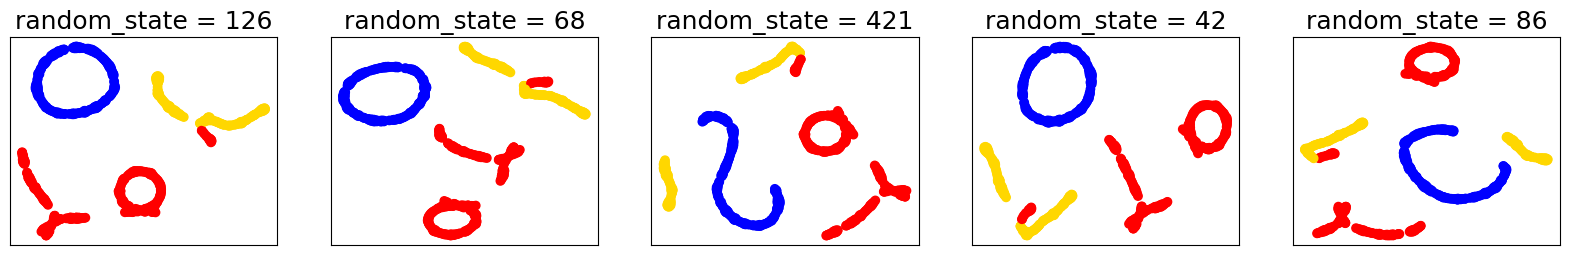

In [5]:
perplexity = 20
rand_states = [126, 68, 421, 42, 86]
Nr = len(rand_states)

(fig, subplots) = plt.subplots(1, Nr, figsize=(4 * Nr, 2.7))

X_all = [None]
for i, rand in enumerate(rand_states):
    ax = subplots[i]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=rand, perplexity=perplexity)
    Y = tsne.fit_transform(data)
    t1 = time()
    ax.set_title(f"random_state = {rand}")
    ax.scatter(Y[:, 0], Y[:, 1], c=y, cmap=mycmap)
    ax.tick_params(left=False, bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    X_all.append(Y)
    
plt.show()

There’s not much difference, the clusters appear to be simply “reshuffled” around in various ways, but with the same color-coding.

## DBSCAN: find labels by applying clustering

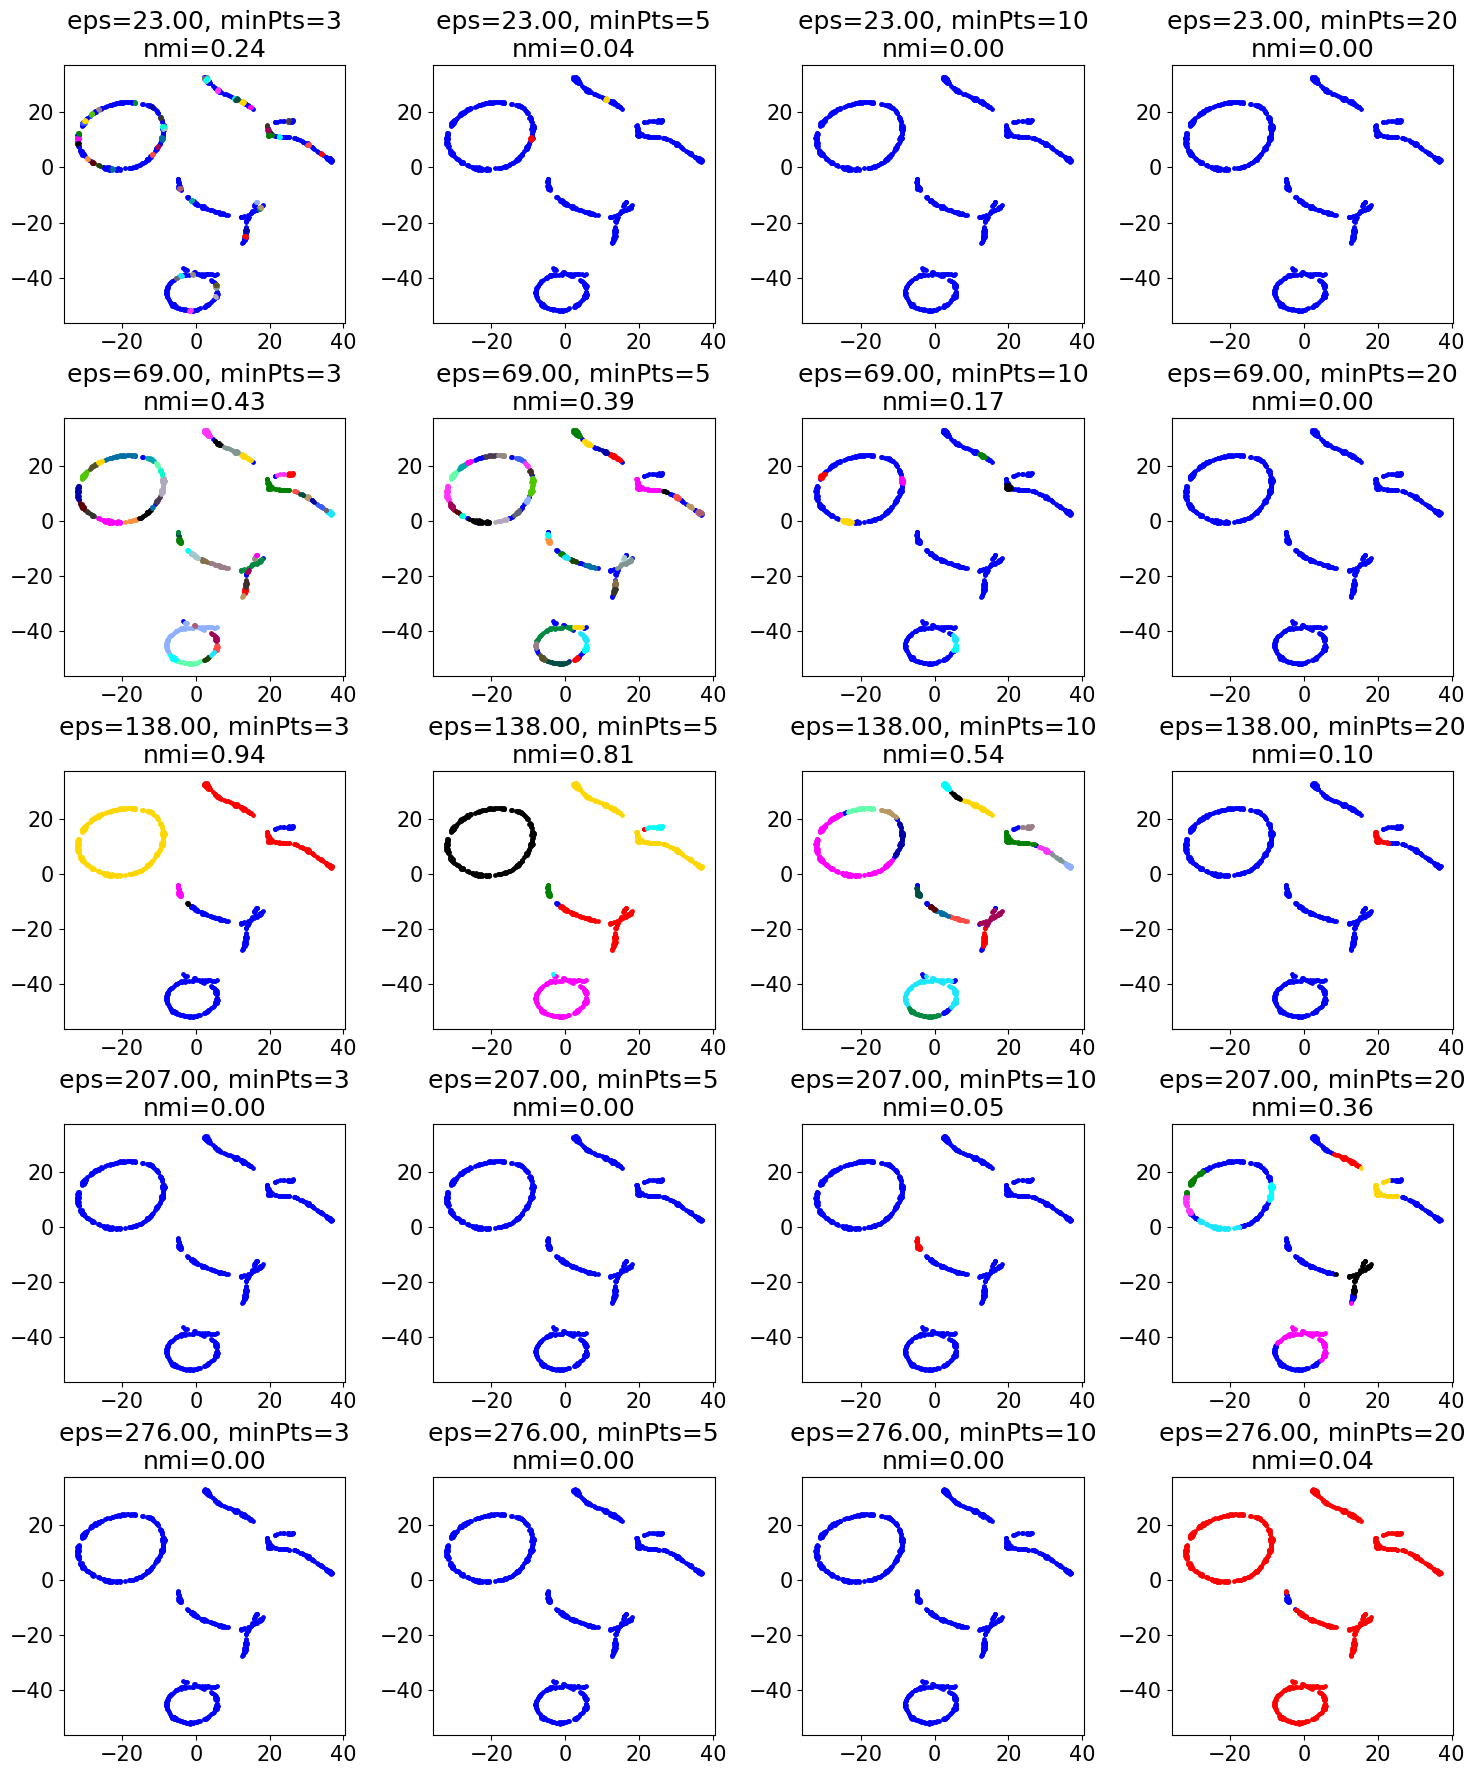

In [6]:
from sklearn.cluster import DBSCAN
# from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
cpalette = ["blue","red","gold","black","magenta","green","cyan","#1CE6FF", "#FF34FF", "#FF4A46","#008941", "#006FA6", "#A30059", "#0000A6", "#63FFAC","#B79762", "#004D43", "#8FB0FF", "#997D87","#5A0007", "#809693","#1B4400", "#4FC601", "#3B5DFF", "#4A3B53","#886F4C","#34362D", "#B4A8BD", "#00A6AA", "#452C2C","#636375", "#A3C8C9", "#FF913F", "#938A81","#575329", "#00FECF", "#B05B6F"]
from collections import OrderedDict
ms = 6

def clustering(y):
    # Finds position of labels and returns a dictionary of
    # cluster labels to data indices.
    yu = np.sort(np.unique(y))
    clustering = OrderedDict()
    for ye in yu:
        clustering[ye] = np.where(y == ye)[0]
    return clustering

def entropy(c, n_sample):
    # Measures the entropy of a cluster
    h = 0.
    for kc in c.keys():
        p=len(c[kc])/n_sample
        h+=p*np.log(p)
    h*=-1.
    return h

# Normalized mutual information function
# Note that this deals with the label permutation problem
def NMI(y_true, y_pred):
    """ Computes normalized mutual information: where y_true and y_pred are both clustering assignments
    """
    w = clustering(y_true)
    c = clustering(y_pred)
    n_sample = len(y_true)

    Iwc = 0.
    for kw in w.keys():
        for kc in c.keys():
            w_intersect_c=len(set(w[kw]).intersection(set(c[kc])))
            if w_intersect_c > 0:
                Iwc += w_intersect_c*np.log(n_sample*w_intersect_c/(len(w[kw])*len(c[kc])))
    Iwc/=n_sample
    Hc = entropy(c,n_sample)
    Hw = entropy(w,n_sample)

    return 2*Iwc/(Hc+Hw)

def plotting_ax(X, y, ax):
    # plotting function
    for i, yu in enumerate(np.unique(y)):
        pos = (y == yu)
        ax.scatter(X[pos,0], X[pos,1],c=cpalette[i%len(cpalette)],s=ms)

# DBSCAN has a few parameters, let's sweep over a few parameters and see what happens
np.random.seed(12345)
n_true_center=3
#X, ytrue = make_blobs(10000, 2, n_true_center) # Generating random gaussian mixture
X2D = X_all[2] # best visualization above
X = data
y_true = y

#eps_range = [0.01,0.1,0.5,1.0,10.]
if mean_min_dist<10:
    r=mean_min_dist
else:
    r = int(mean_min_dist)
eps_range = [r,3*r,6*r,9*r,12*r]
min_sample_range = [3,5,10,20]
fig, ax = plt.subplots(len(eps_range),len(min_sample_range),figsize=(15,18))
for i, eps in enumerate(eps_range):
    for j, min_samples in enumerate(min_sample_range):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(X)
        y_hat = model.labels_
        plotting_ax(X2D,y_hat,ax[i,j])
        nmi=NMI(y_hat, y_true)
        ax[i,j].set_title('eps=%.2f, minPts=%i\nnmi=%.2f'%(eps,min_samples,nmi))
plt.tight_layout(h_pad=0.5)
plt.show()


In [7]:
import seaborn as sns

eps_range = np.linspace(2 * r, 12 * r, 50)
minpts_range = np.arange(1, 50, 1)

nmi = np.zeros((len(eps_range), len(minpts_range)))
for i in range(len(eps_range)):
    for j in range(len(minpts_range)):
        model = DBSCAN(eps=eps_range[i], min_samples=minpts_range[j])
        y_hat = model.fit(X).labels_
        nmi[i, j] = NMI(y_hat, y_true)


/var/folders/mm/583s4ppn42l0g18_9qw8b3hm0000gn/T/ipykernel_70079/1624909180.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels)


Text(44.7222222222222, 0.5, 'eps')

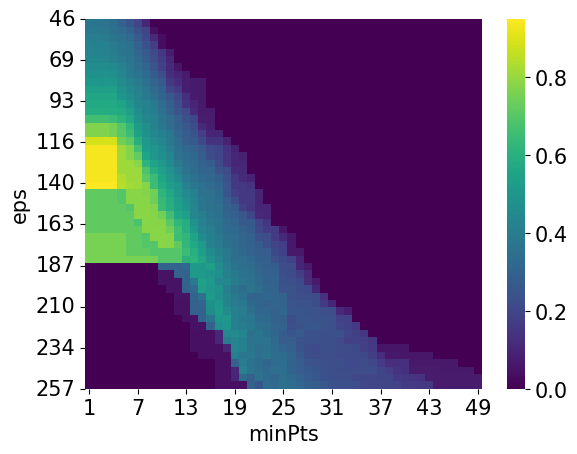

In [8]:
import pandas as pd
import matplotlib.ticker as ticker

nmi = pd.DataFrame(nmi, columns=minpts_range, index=eps_range)
g = sns.heatmap(nmi, xticklabels=6, cmap='viridis')

g.yaxis.set_major_locator(ticker.LinearLocator(10))
ylabels = [f"{i:.0f}" for i in eps_range[::(len(eps_range) // 10)]]
g.set_yticklabels(ylabels)

g.set_xlabel("minPts")
g.set_ylabel("eps")

### Results 
The only combination of (`minPts`, `eps`) that gives good results is in the `eps` $\in [1, 4]$, `minPts` $\in [110, 150]$ area, so ab then the performance drops considerably. 
The only correlation that we might identify between the two parameters is in the diagonal light blue region. In fact, it is reasonable to think that the effects of increasing the distance along with increasing the minimum number of points that constitute a cluster will balance each other out leading to similar results. However, performance remains quite poor in this area, not allowing for a satisfactory clustering performance outside the aforementioned region.